# Hello!

This is an interactive  environment for playing with the decirculator. Here we show the capabilities of what our simple network can achieve when reconstructing complex PSF duplicated image data. The easiest way to run this is on Google Colab, however, this same notebook can also be run locally. First, let's clone the repository. Don't do this if you are running it on your local machine as it is not necessary.

Important! Before running anything, change the runtime to TPU! 

- Navigate to Edit→Notebook Settings
- Select TPU from the Hardware Accelerator drop-down

In [ ]:


!rm -rf Decirculator

!git clone https://github.com/SAbakumov/Decirculator.git


Let's import everything we need:

In [22]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

try: #This is purely a Colab thing
    file_path_origami = 'Decirculator/spt/data_spt/Origami/18.tif'
    path_weights = 'Decirculator/models/weights/model_final_weights.h5'
    from Decirculator.models.unet import *
    from Decirculator.training.trainer import * 
    from Decirculator.data.loader import *  
except:
    file_path_origami = 'spt/data_spt/Origami/18.tif'
    path_weights = 'models/weights/model_final_weights.h5'
    from models.unet import *
    from training.trainer import * 
    from data.loader import *  




To make use of interactive capabilities of plotly in Colab, we need to run this code snippet

In [ ]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

Now, let us load the data: in this repository, we have 2 datasets to play with

- An small portion of SMLM data from our reconstructed image.
- The small portion of data that was used for Origami tracking. 

We  will load the origami data here, since the results are 'more visual' than in case of SMLM. If you are running this on colab, the plot will be interactive, however, offline it will use the matplotlib library and display the first image

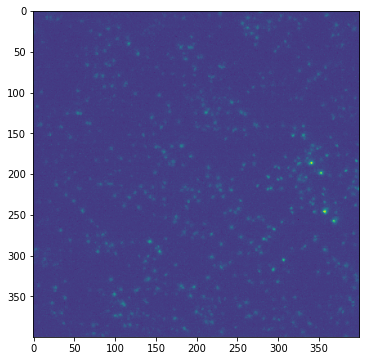

In [26]:
test_data_origami = Loader(file_path_origami, '')
test_data_origami.load_test_data(file_path_origami,background_subtraction='mean' )
try:
    fig = px.imshow(np.squeeze(test_data_origami.test_data), animation_frame=0, binary_string=True, labels=dict(animation_frame="Slice"))
    fig.show()
except:
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(6,6))
    plt.imshow(test_data_origami.test_data[60,:,:])

    

Now, let'us run the decirculator pipeline on this image. The decirculator is trained on SMLM data with a slightly different contrast, therefore, to apply it to our origami data, the contrast needs to be slightly adjusted by multiplying the image array with a fixed number (3.5 gave the best results)

In [ ]:
contrast = 3.5
model = GetFullModel((None, None, 1),(None, None, 3))
trainer = TrainModel(model)
y_data = trainer.predict_transposed(contrast*test_data_origami.test_data, path_weights)


Let us plot what we got

In [ ]:
fig = px.make_subplots(1, 2)

fig.imshow(np.squeeze(y_data[:,:,:,:]), row=1,col=1, animation_frame=0, binary_string=True, labels=dict(animation_frame="Slice"),zmin=0, zmax=70)
fig.imshow(np.squeeze(test_data_origami.test_data),row=1,col=2, animation_frame=0, binary_string=True, labels=dict(animation_frame="Slice"))

# fig.update_layout(autosize=False,width=800,height=800)
fig.show()